<a href="https://github.com/amx122">Хань Євгеній</a>, 2024

#### <h1 align="center">Лабораторна робота №7. Методи кластеризації (навчання без учителя)
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>1.Реалізувати всі алгоритми кластеризації, наведені в роботі, для свого варіанта, обгрунтувавши знаення відповідних параметрів.</li>

</ol>
<h2>Алгоритм K-середніх</h2>

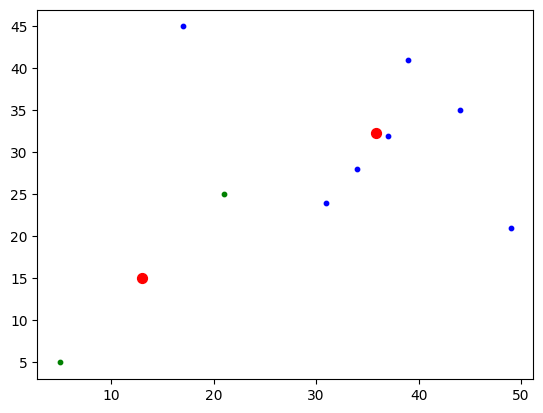

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ваші дані
x_train_6 = np.array([[49, 21],
                      [5, 5],
                      [37, 32],
                      [21, 25],
                      [34, 28],
                      [44, 35],
                      [39, 41],
                      [17, 45],
                      [31, 24]])

y_train_6 = np.array([-1, 1, 1, -1, -1, -1, 1, -1, 1])

# Адаптація даних до формату вихідного алгоритму
x = x_train_6

# Обчислення середніх та дисперсій
M = np.mean(x, axis=0)
D = np.var(x, axis=0)

# Визначення кількості кластерів
K = len(np.unique(y_train_6))

# Генерація початкових центрів кластерів
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]

# Функція для обчислення евклідової метрики
ro = lambda x_vect, m_vect: np.mean((x_vect - m_vect) ** 2)

# Колірування кластерів
COLORS = ('green', 'blue', 'brown', 'black')

# Ініціалізація графіка
plt.ion()

n = 0
while n < 10:
    X = [[] for i in range(K)]

    for x_vect, y_label in zip(x, y_train_6):
        r = [ro(x_vect, m) for m in ma]
        X[np.argmin(r)].append(x_vect)

    ma = [np.mean(xx, axis=0) for xx in X]

    plt.clf()

    # Відображення кластерів
    for i in range(K):
        xx = np.array(X[i]).T
        plt.scatter(xx[0], xx[1], s=10, color=COLORS[i])

    # Відображення центрів кластерів
    mx = [m[0] for m in ma]
    my = [m[1] for m in ma]
    plt.scatter(mx, my, s=50, color='red')

    plt.draw()
    plt.gcf().canvas.flush_events()

    n += 1

plt.ioff()
plt.show()


<h2>Алгоритм DBSCAN</h2>

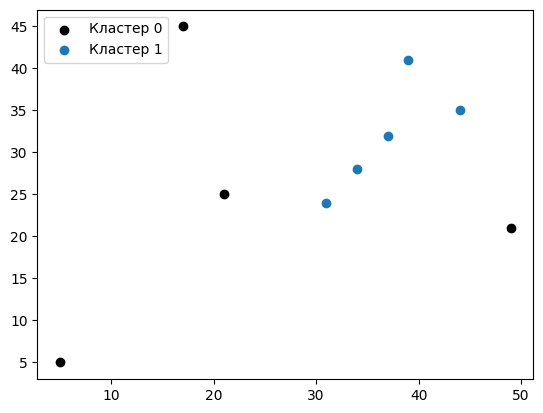

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_6 = np.array([[49, 21], [5, 5], [37, 32], [21, 25], [34, 28], [44, 35], [39, 41], [17, 45], [31, 24]])
y_train_6 = np.array([-1, 1, 1, -1, -1, -1, 1, -1, 1])

# Розмір епсилон-околу
eps = 10
# Мінімальна кількість об'єктів для повного епсилон-околу
m = 2

# Використання алгоритму DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=m)
dbscan.fit(x_train_6)
labels = dbscan.labels_

# Вивід кластерів
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:
        plt.scatter(x_train_6[labels == label][:, 0], x_train_6[labels == label][:, 1], color='k', label='Кластер 0')
    else:
        plt.scatter(x_train_6[labels == label][:, 0], x_train_6[labels == label][:, 1], label='Кластер 1')

plt.legend()
plt.show()


<h2>Алгоритм K-середніх</h2>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


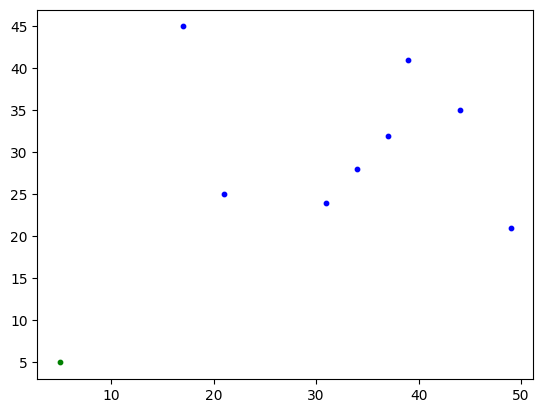

In [20]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# вхідні зображення для кластеризації
x = np.array([[49, 21], [5, 5], [37, 32], [21, 25], [34, 28], [44, 35], [39, 41], [17, 45], [31, 24]])

NC = 2  # максимальна кількість кластерів (кінцевих)

# використання алгоритму KMeans
kmeans = KMeans(n_clusters=NC)
kmeans.fit(x)
x_pr = kmeans.predict(x)

# відображення результату кластеризації
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(NC)):
    clst = x[x_pr == n].T
    plt.scatter(clst[0], clst[1], s=10, color=c)

plt.show()


<h1 align="center">Контрольні запитання</h1>

1. **Задача кластеризації та її цілі:**
   
   **Кластеризація** полягає в групуванні схожих об'єктів у колекції. Основна **мета** - забезпечити, щоб об'єкти всередині кожного кластера були якомога більш схожими між собою, в той час як об'єкти між різними кластерами були якомога менш схожими. Основні **цілі** кластеризації включають в себе виявлення природних груп об'єктів у даних, розуміння структури даних та спрощення подальшого аналізу даних.

2. **Критерії оцінки якості кластеризації:**
   
   Для оцінки якості кластеризації можуть використовуватися **метрики** внутрішнього та зовнішнього зв'язку. Деякі **популярні метрики** включають індекс силуету, додаткову дисперсію, кількість кластерів, довжину периметра та інші.

3. **Задача часткового навчання, алгоритм k-середніх та DBSCAN:**
   
   - **Задача часткового навчання** в контексті кластеризації виникає, коли доступні лише деякі мітки класів для обмеженого підмножини даних. У цьому випадку мета полягає в тому, щоб використати ці обмежені мітки класів для покращення якості розбиття.
   
   - **Алгоритм k-середніх (k-means)** полягає в групуванні об'єктів у k кластерів, мінімізуючи середній квадрат відстаней між кожним об'єктом і центром його кластера.
   
   - **Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** групує об'єкти у кластери на основі їх густини в просторі ознак. Він виявляє області високої густини, що відповідають кластерам, і розділяє області низької густини або окремі точки як шум.

4. **Реалізація алгоритму DBSCAN за допомогою scikit-learn:**
   
   Можна використати модуль `sklearn.cluster.DBSCAN` для реалізації алгоритму DBSCAN в Python засобами бібліотеки scikit-learn. Це дає можливість використовувати різні параметри, такі як радіус епсилон і мінімальна кількість сусідів, для налаштування алгоритму залежно від конкретних потреб.